<a href="https://colab.research.google.com/github/priyalpote/pandas/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning

In [37]:
import pandas as p
import numpy as n

In [38]:
df= p.read_csv('landslides.csv')
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [40]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

#remove null valued raws


In [41]:
df= df[~df['date'].isnull()]

In [42]:
df['time'].value_counts()

Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: time, Length: 159, dtype: int64

In [43]:
df['time']= df['time'].fillna('Not Known')

<ipython-input-43-540999d55fef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']= df['time'].fillna('Not Known')


In [44]:
fatalities_mean= df['fatalities'].mean()
fatalities_mean

1.4622314622314623

In [45]:
df['fatalities']= df['fatalities'].fillna(fatalities_mean)

<ipython-input-45-a80a8a275232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities']= df['fatalities'].fillna(fatalities_mean)


In [46]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


#correct the data type

In [49]:
df['date']= p.to_datetime(df['date'], format='%m/%d/%y')

In [54]:
month= df['date'].dt.month
month

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: date, Length: 1690, dtype: int64

In [55]:
import seaborn as sb

In [56]:
month = month.dropna()

<Axes: xlabel='date', ylabel='Count'>

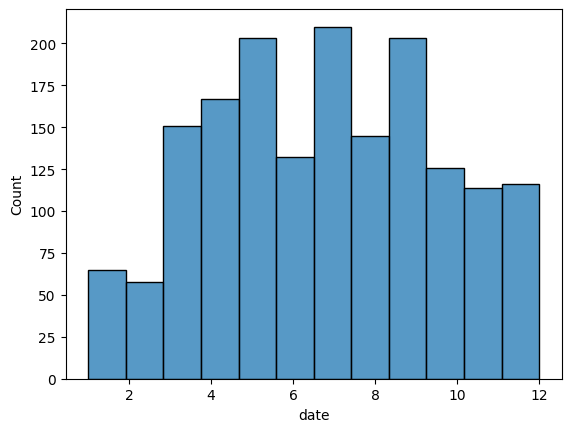

In [57]:
sb.histplot(month,kde=False, bins=12)

#parse date in time series data

In [64]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,2007-03-22,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,2007-04-06,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,2007-04-14,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,2007-04-15,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,2015-12-07,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2016-02-22,Morning,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2016-02-23,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2016-02-26,Night,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [65]:
df['time'].value_counts()

Not Known    1068
Morning       264
Night         149
Afternoon     144
Evening        65
Name: time, dtype: int64

In [62]:
def format_time(x):
  if 'Not Known'.lower()==x.lower():
    return 'Not Known'
  elif 'night' in x.lower():
    return 'Night'
  elif 'morning' in x.lower():
    return 'Morning'
  elif 'afternoon' in x.lower():
    return 'Afternoon'
  elif 'evening' in x.lower():
    return 'Evening'
  elif ':' in x. lower():
    if int(x.split(':')[0])<12:
      return 'Morning'
    elif int(x.split(':')[0])>20:
      return 'Night'
    elif int(x.split(':')[0])>16 and int(x.split(':')[0])<20:
      return 'Evening'
    else:
      return 'Afternoon'
  else:
    return 'Not Known'

In [63]:
df['time']= df['time'].apply(format_time)